In [3]:
import torch
import numpy as np
from datetime import datetime
import os
import random
import matplotlib.pyplot as plt

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
base_dir = "/home/felix/Documents/Climate/climate_learn"

## Downloading Dataset

In [ ]:
from climate_learn.data import download
import os
api_key = "154140:40d3d2e0-ed2c-4f60-8bc8-d15789841be0" # Change to your_api_key
download(root = f"{base_dir}", source = "weatherbench", variable = "2m_temperature", dataset = "era5", resolution = "5.625")

## Dataset init.

In [7]:
from climate_learn.utils.datetime import Year, Days, Hours
from climate_learn.data import DataModule

data_module = DataModule(
    dataset = "ERA5",
    task = "downscaling",
    root_dir = f"{base_dir}/data/weatherbench/era5/5.625",
    root_highres_dir = f"{base_dir}/data/weatherbench/era5/5.625",
    in_vars = ["total_precipitation"],
    out_vars = ["total_precipitation"],
    train_start_year = Year(1979),
    val_start_year = Year(2015),
    test_start_year = Year(2017),
    end_year = Year(2018),
    subsample = Hours(6),
    batch_size = 256,
    num_workers = 12
)

Creating train dataset


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Creating val dataset


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Creating test dataset


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

## Load Model and Train

In [5]:
from climate_learn.models import load_model, set_climatology

model_kwargs = {
    "hidden_channels": 3,
    "in_channels": len(data_module.hparams.in_vars),
    "out_channels": len(data_module.hparams.out_vars),
    "upsampling": data_module.train_dataset.downscale_ratio,
    "n_blocks": 4,
}

optim_kwargs = {
    "optimizer": "adamw",
    "lr": 1e-4,
    "weight_decay": 1e-5,
    "warmup_epochs": 1,
    "max_epochs": 5,
}

model_module = load_model(name = "unet", task = "downscaling", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)

set_climatology(model_module, data_module)

NameError: name 'data_module' is not defined

In [ ]:
from climate_learn.training import Trainer, WandbLogger

trainer = Trainer(
    seed = 0,
    accelerator = "gpu",
    precision = 16,
    max_epochs = 5,
    # logger = WandbLogger(project = "climate_tutorial", name = "downscale-vit")
)

Global seed set to 0


In [22]:
trainer.fit(model_module, data_module)

/home/felix/Documents/Climate/climate_env/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:604: UserWarning: Checkpoint directory /home/felix/Documents/Climate/climate_learn/climate_learn/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


┏━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃     ┃ Name                          ┃ Type              ┃ Params ┃
┡━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0   │ net                           │ Unet              │  555 K │
│ 1   │ net.activation                │ LeakyReLU         │      0 │
│ 2   │ net.image_proj                │ PeriodicConv2D    │    150 │
│ 3   │ net.image_proj.padding        │ PeriodicPadding2D │      0 │
│ 4   │ net.image_proj.conv           │ Conv2d            │    150 │
│ 5   │ net.down                      │ ModuleList        │  167 K │
│ 6   │ net.down.0                    │ DownBlock         │    180 │
│ 7   │ net.down.0.res                │ ResidualBlock     │    180 │
│ 8   │ net.down.0.res.activation     │ LeakyReLU         │      0 │
│ 9   │ net.down.0.res.conv1          │ PeriodicConv2D    │     84 │
│ 10  │ net.down.0.res.conv1.padding  │ PeriodicPadding2D │      0 │
│ 11  │ net.down.0.res.conv1.conv     │ Conv2d            │     84 │
│ 12  │ net.down.0.res.conv2          │ PeriodicConv2D    │     84 │
│ 13  │ net.down.0.res.conv2.padding  │ PeriodicPadding2D │      0 │
│ 14  │ net.down.0.res.conv2.conv     │ Conv2d            │     84 │
│ 15  │ net.down.0.res.shortcut       │ Identity          │      0 │
│ 16  │ net.down.0.res.norm1          │ BatchNorm2d       │      6 │
│ 17  │ net.down.0.res.norm2          │ BatchNorm2d       │      6 │
│ 18  │ net.down.0.res.drop           │ Dropout           │      0 │
│ 19  │ net.down.0.attn               │ Identity          │      0 │
│ 20  │ net.down.1                    │ DownBlock         │    180 │
│ 21  │ net.down.1.res                │ ResidualBlock     │    180 │
│ 22  │ net.down.1.res.activation     │ LeakyReLU         │      0 │
│ 23  │ net.down.1.res.conv1          │ PeriodicConv2D    │     84 │
│ 24  │ net.down.1.res.conv1.padding  │ PeriodicPadding2D │      0 │
│ 25  │ net.down.1.res.conv1.conv     │ Conv2d            │     84 │
│ 26  │ net.down.1.res.conv2          │ PeriodicConv2D    │     84 │
│ 27  │ net.down.1.res.conv2.padding  │ PeriodicPadding2D │      0 │
│ 28  │ net.down.1.res.conv2.conv     │ Conv2d            │     84 │
│ 29  │ net.down.1.res.shortcut       │ Identity          │      0 │
│ 30  │ net.down.1.res.norm1          │ BatchNorm2d       │      6 │
│ 31  │ net.down.1.res.norm2          │ BatchNorm2d       │      6 │
│ 32  │ net.down.1.res.drop           │ Dropout           │      0 │
│ 33  │ net.down.1.attn               │ Identity          │      0 │
│ 34  │ net.down.2                    │ DownBlock         │    180 │
│ 35  │ net.down.2.res                │ ResidualBlock     │    180 │
│ 36  │ net.down.2.res.activation     │ LeakyReLU         │      0 │
│ 37  │ net.down.2.res.conv1          │ PeriodicConv2D    │     84 │
│ 38  │ net.down.2.res.conv1.padding  │ PeriodicPadding2D │      0 │
│ 39  │ net.down.2.res.conv1.conv     │ Conv2d            │     84 │
│ 40  │ net.down.2.res.conv2          │ PeriodicConv2D    │     84 │
│ 41  │ net.down.2.res.conv2.padding  │ PeriodicPadding2D │      0 │
│ 42  │ net.down.2.res.conv2.conv     │ Conv2d            │     84 │
│ 43  │ net.down.2.res.shortcut       │ Identity          │      0 │
│ 44  │ net.down.2.res.norm1          │ BatchNorm2d       │      6 │
│ 45  │ net.down.2.res.norm2          │ BatchNorm2d       │      6 │
│ 46  │ net.down.2.res.drop           │ Dropout           │      0 │
│ 47  │ net.down.2.attn               │ Identity          │      0 │
│ 48  │ net.down.3                    │ DownBlock         │    180 │
│ 49  │ net.down.3.res                │ ResidualBlock     │    180 │
│ 50  │ net.down.3.res.activation     │ LeakyReLU         │      0 │
│ 51  │ net.down.3.res.conv1          │ PeriodicConv2D    │     84 │
│ 52  │ net.down.3.res.conv1.padding  │ PeriodicPadding2D │      0 │
│ 53  │ net.down.3.res.conv1.conv     │ Conv2d            │     84 │
│ 54  │ net.down.3.res.conv2          │ PeriodicConv2D    │     84 

Trainable params: 555 K                                                                                            
Non-trainable params: 0                                                                                            
Total params: 555 K                                                                                                
Total estimated model params size (MB): 1

Output()

/home/felix/Documents/Climate/climate_env/lib/python3.8/site-packages/pytorch_lightning/trainer/call.py:48: 
UserWarning: Detected KeyboardInterrupt, attempting graceful shutdown...
  rank_zero_warn("Detected KeyboardInterrupt, attempting graceful shutdown...")

In [ ]:
torch.save(model_module.state_dict(), f"{base_dir}/saved_models/0.75UNet")

## Load FactorizedPrior(or more) Model and Train

In [16]:
from climate_learn.models import load_model, set_climatology

model_kwargs = {
    "M": 64,
    "N": 128
}

optim_kwargs = {
    "optimizer": "adamw",
    "lr": 1e-4,
    "weight_decay": 1e-5,
    "warmup_epochs": 1,
    "max_epochs": 5,
}

model_module = load_model(name = "factorized_prior", task = "compression", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)
set_climatology(model_module, data_module)

In [6]:
from climate_learn.training import Trainer, WandbLogger

trainer = Trainer(
    seed = 1337,
    accelerator = "gpu",
    precision = 16,
    max_epochs = 5,
    logger = True
)

Global seed set to 1337


In [7]:
trainer.fit(model_module, data_module)

┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃    ┃ Name                                          ┃ Type                    ┃ Params ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0  │ rd_loss                                       │ RateDistortionLoss      │      0 │
│ 1  │ rd_loss.mse                                   │ MSELoss                 │      0 │
│ 2  │ net                                           │ FactorizedPrior         │  1.8 M │
│ 3  │ net.entropy_bottleneck                        │ EntropyBottleneck       │    976 │
│ 4  │ net.entropy_bottleneck.likelihood_lower_bound │ LowerBound              │      0 │
│ 5  │ net.g_a                                       │ Sequential              │  923 K │
│ 6  │ net.g_a.0                                     │ Conv2d                  │  3.3 K │
│ 7  │ net.g_a.1                                     │ GDN                     │ 16.5 K │
│ 8  │ net.g_a.1.beta_reparam                        │ NonNegativeParametrizer │      0 │
│ 9  │ net.g_a.1.beta_reparam.lower_bound            │ LowerBound              │      0 │
│ 10 │ net.g_a.1.gamma_reparam                       │ NonNegativeParametrizer │      0 │
│ 11 │ net.g_a.1.gamma_reparam.lower_bound           │ LowerBound              │      0 │
│ 12 │ net.g_a.2                                     │ Conv2d                  │  409 K │
│ 13 │ net.g_a.3                                     │ GDN                     │ 16.5 K │
│ 14 │ net.g_a.3.beta_reparam                        │ NonNegativeParametrizer │      0 │
│ 15 │ net.g_a.3.beta_reparam.lower_bound            │ LowerBound              │      0 │
│ 16 │ net.g_a.3.gamma_reparam                       │ NonNegativeParametrizer │      0 │
│ 17 │ net.g_a.3.gamma_reparam.lower_bound           │ LowerBound              │      0 │
│ 18 │ net.g_a.4                                     │ Conv2d                  │  409 K │
│ 19 │ net.g_a.5                                     │ GDN                     │ 16.5 K │
│ 20 │ net.g_a.5.beta_reparam                        │ NonNegativeParametrizer │      0 │
│ 21 │ net.g_a.5.beta_reparam.lower_bound            │ LowerBound              │      0 │
│ 22 │ net.g_a.5.gamma_reparam                       │ NonNegativeParametrizer │      0 │
│ 23 │ net.g_a.5.gamma_reparam.lower_bound           │ LowerBound              │      0 │
│ 24 │ net.g_a.6                                     │ Conv2d                  │ 51.2 K │
│ 25 │ net.g_s                                       │ Sequential              │  923 K │
│ 26 │ net.g_s.0                                     │ ConvTranspose2d         │ 51.3 K │
│ 27 │ net.g_s.1                                     │ GDN                     │ 16.5 K │
│ 28 │ net.g_s.1.beta_reparam                        │ NonNegativeParametrizer │      0 │
│ 29 │ net.g_s.1.beta_reparam.lower_bound            │ LowerBound              │      0 │
│ 30 │ net.g_s.1.gamma_reparam                       │ NonNegativeParametrizer │      0 │
│ 31 │ net.g_s.1.gamma_reparam.lower_bound           │ LowerBound              │      0 │
│ 32 │ net.g_s.2                                     │ ConvTranspose2d         │  409 K │
│ 33 │ net.g_s.3                                     │ GDN                     │ 16.5 K │
│ 34 │ net.g_s.3.beta_reparam                        │ NonNegativeParametrizer │      0 │
│ 35 │ net.g_s.3.beta_reparam.lower_bound            │ LowerBound              │      0 │
│ 36 │ net.g_s.3.gamma_reparam                       │ NonNegativeParametrizer │      0 │
│ 37 │ net.g_s.3.gamma_reparam.lower_bound           │ LowerBound              │      0 │
│ 38 │ net.g_s.4                                     │ ConvTranspose2d         │  409 K │
│ 39 │ net.g_s.5                                     │ GDN                     │ 16.5 K │
│ 40 │ net.g_s.5.beta_reparam                        │ NonNegativeParametrizer │      0 │
│ 41 │ net.g_s.5.beta_reparam.lower_boun

Trainable params: 1.8 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.8 M                                                                                                
Total estimated model params size (MB): 3

Output()

In [8]:
import os
torch.save(model_module.state_dict(), f"{base_dir}/saved_models/5_625FactorizedPrior_128N_16M")

In [17]:
model_module.load_state_dict(torch.load(f"{base_dir}/saved_models/5_625FactorizedPrior_128N_64M"))

<All keys matched successfully>

In [76]:
eval(f"data_module.{split}_dataset")[0][0].shape


torch.Size([1, 32, 64])

In [77]:
torch.reshape(torch.ones(64,128,2,4), (64, 1, -1)).shape

torch.Size([64, 1, 1024])

In [93]:
def save_compressed_data(split):
  dataset = eval(f"data_module.{split}_dataset")
  for year in dataset.years:
    print(f"Saving: {year}")
    idxs = [np.searchsorted(dataset.time, 
                            np.datetime64(datetime.strptime(dt, "%Y-%m-%d:%H"))) for dt in [f"{year}-01-01:00", f"{year}-12-31:23"]]
    y_hat = model_module.net.forward(
      dataset[idxs[0]:idxs[1]][0], # x
    )['y_hat']
    b_s, _, _, _ = y_hat.shape
    print(y_hat.shape)
    torch.save(
        torch.reshape(y_hat, (b_s, 1, -1)),
        f"{base_dir}/data/weatherbench/era5/5.625/compressed_tp_96/tp_{year}_5.625deg.pt"
    )

In [84]:
print( f"{base_dir}/data/weatherbench/era5/5.625/compressed_tp_16/tp_{year}_5.625deg.pt")

/home/felix/Documents/Climate/climate_learn/data/weatherbench/era5/5.625/compressed_tp_16/tp_1980_5.625deg.pt


In [66]:
import xarray as xr


def save_compressed_data_nc(split):
  dataset = eval(f"data_module.{split}_dataset")
  for year in dataset.years:
    print(f"Saving: {year}")
    idxs = [np.searchsorted(dataset.time, 
                            np.datetime64(datetime.strptime(dt, "%Y-%m-%d:%H"))) for dt in [f"{year}-01-01:00", f"{year}-12-31:23"]]
    # y_hat = model_module.net.forward(
    #   dataset[idxs[0]:idxs[1]][0], # x
    # )['y_hat']
    # b_s, _, _, _ = y_hat.shape
    # print(y_hat.shape)
    # xr.DataArray(torch.reshape(y_hat, (b_s, 1, -1)).detach().numpy()).to_netcdf(f"{base_dir}/data/weatherbench/era5/5.625/compressed_tp_nc_64/tp_{year}_5_625deg.nc")
    xr.DataArray(dataset[idxs[0]:idxs[1]][0].numpy()).to_netcdf(f"{base_dir}/data/weatherbench/era5/5.625/noncompressed_tp_nc/tp_{year}_5_625deg.nc")


In [94]:
os.mkdir(f"{base_dir}/data/weatherbench/era5/5.625/compressed_tp_96")

In [95]:
save_compressed_data('train')
save_compressed_data('test')
save_compressed_data('val')

Saving: 1979
torch.Size([1459, 96, 2, 4])
Saving: 1980
torch.Size([1464, 96, 2, 4])
Saving: 1981
torch.Size([1460, 96, 2, 4])
Saving: 1982
torch.Size([1460, 96, 2, 4])
Saving: 1983
torch.Size([1460, 96, 2, 4])
Saving: 1984
torch.Size([1464, 96, 2, 4])
Saving: 1985
torch.Size([1460, 96, 2, 4])
Saving: 1986
torch.Size([1460, 96, 2, 4])
Saving: 1987
torch.Size([1460, 96, 2, 4])
Saving: 1988
torch.Size([1464, 96, 2, 4])
Saving: 1989
torch.Size([1460, 96, 2, 4])
Saving: 1990
torch.Size([1460, 96, 2, 4])
Saving: 1991
torch.Size([1460, 96, 2, 4])
Saving: 1992
torch.Size([1464, 96, 2, 4])
Saving: 1993
torch.Size([1460, 96, 2, 4])
Saving: 1994
torch.Size([1460, 96, 2, 4])
Saving: 1995
torch.Size([1460, 96, 2, 4])
Saving: 1996
torch.Size([1464, 96, 2, 4])
Saving: 1997
torch.Size([1460, 96, 2, 4])
Saving: 1998
torch.Size([1460, 96, 2, 4])
Saving: 1999
torch.Size([1460, 96, 2, 4])
Saving: 2000
torch.Size([1464, 96, 2, 4])
Saving: 2001
torch.Size([1460, 96, 2, 4])
Saving: 2002
torch.Size([1460, 96,

In [14]:

compression_ratio = (1 - (os.path.getsize(
    f"{base_dir}/data/weatherbench/era5/5.625/compressed_tp_nc_16/tp_1979_5_625deg.nc"
  ) / 
  os.path.getsize(
    f"{base_dir}/data/weatherbench/era5/5.625/noncompressed_tp_nc/tp_1979_5_625deg.nc"
  ))) * 100
print(f"compressed {compression_ratio}% in terms of bytes")

compressed 93.68516518034197% in terms of bytes


In [15]:
import xarray as xr

xr.open_mfdataset(f"{base_dir}/data/weatherbench/era5/5.625/compressed_tp_nc/tp_1979_5_625deg.nc")

<xarray.Dataset>
Dimensions:                        (dim_0: 1459, dim_1: 1, dim_2: 768)
Dimensions without coordinates: dim_0, dim_1, dim_2
Data variables:
    __xarray_dataarray_variable__  (dim_0, dim_1, dim_2) float32 dask.array<chunksize=(1459, 1, 768), meta=np.ndarray>

In [16]:
xr.open_mfdataset(f"{base_dir}/data/weatherbench/era5/5.625/total_precipitation/total_precipitation_1979_5.625deg.nc")

<xarray.Dataset>
Dimensions:  (lat: 32, lon: 64, time: 8753)
Coordinates:
  * lat      (lat) float64 -87.19 -81.56 -75.94 -70.31 ... 75.94 81.56 87.19
  * lon      (lon) float64 0.0 5.625 11.25 16.88 ... 337.5 343.1 348.8 354.4
  * time     (time) datetime64[ns] 1979-01-01T07:00:00 ... 1979-12-31T23:00:00
Data variables:
    tp       (time, lat, lon) float32 dask.array<chunksize=(8753, 32, 64), meta=np.ndarray>
Attributes:
    Conventions:  CF-1.6
    history:      2020-01-01 16:44:41 GMT by grib_to_netcdf-2.15.0: /opt/ecmw...

In [ ]:
from climate_learn.models import load_model, set_climatology

model_kwargs = {
    "M": 64,
    "N": 128
}

optim_kwargs = {
    "optimizer": "adamw",
    "lr": 1e-3,
    "weight_decay": 1e-5,
    "warmup_epochs": 1,
    "max_epochs": 5,
}

model_module = load_model(name = "factorized_prior", task = "compression", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)
set_climatology(model_module, data_module)


trainer = Trainer(
    seed = 1337,
    accelerator = "gpu",
    precision = 16,
    max_epochs = 5,
    logger = True
)
trainer.fit(model_module, data_module)

torch.save(model_module.state_dict(), f"{base_dir}/saved_models/5_625FactorizedPrior_128N_64M_1e3")


NameError: name 'Trainer' is not defined

In [61]:
5976811/71785116

0.08325975262058502

In [52]:
os.mkdir('/home/felix/Documents/Climate/climate_learn/data/weatherbench/era5/5.625/compressed_tp')

In [44]:
dataset[idxs[0]:idxs[1]][0].shape

torch.Size([1460, 1, 32, 64])

TODO:

FactorizedPrior (ME)
- bottleneck size 1
    - train forecast on compressed
- bottleneck size 2
    - train forecast on compressed

SOME SAME MODEL but easier resolution size (ME?)
- bottleneck size 1
    - train forecast on compressed
- bottleneck size 2
    - train forecast on compressed


In [18]:
from compressai.losses import RateDistortionLoss
from compressai.models import (
    FactorizedPrior,
    JointAutoregressiveHierarchicalPriors,
    ScaleHyperprior,
)

In [63]:
factorized_prior = FactorizedPrior(128, 96)

In [65]:
import torch
x = torch.rand(size=(1,32,64)).unsqueeze(0)
ret = factorized_prior(x)
ret['y_hat'].shape

torch.Size([1, 96, 2, 4])

## Test on Test Set

In [92]:

model_kwargs = {
    "M": 96,
    "N": 128
}

optim_kwargs = {
    "optimizer": "adamw",
    "lr": 1e-3,
    "weight_decay": 1e-5,
    "warmup_epochs": 1,
    "max_epochs": 5,
}

model_module = load_model(name = "factorized_prior", task = "compression", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)
set_climatology(model_module, data_module)
model_module.load_state_dict(torch.load(f"{base_dir}/saved_models/5_625FactorizedPrior_128N_96M"))


<All keys matched successfully>

In [42]:
print('''16x2x4''')
trainer.test(model_module, data_module)

Output()

16x2x4


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                  Test metric                   ┃                  DataLoader 0                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│                 test/bpp_loss                  │              0.30486905574798584               │
│                   test/loss                    │               550.5278930664062                │
│  test/mean_bias:mean_bias_total_precipitation  │                      0.0                       │
│                 test/mse_loss                  │               0.8461714386940002               │
│ test/pearson_loss:pearsonr_total_precipitation │               0.9999999999999966               │
└────────────────────────────────────────────────┴────────────────────────────────────────────────┘

In [40]:
print('''64x2x4''')
trainer.test(model_module, data_module)

Output()

64x2x4


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                  Test metric                   ┃                  DataLoader 0                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│                 test/bpp_loss                  │               1.1100502014160156               │
│                   test/loss                    │               202.6835174560547                │
│  test/mean_bias:mean_bias_total_precipitation  │                      0.0                       │
│                 test/mse_loss                  │              0.30999377369880676               │
│ test/pearson_loss:pearsonr_total_precipitation │               0.9999999999999966               │
└────────────────────────────────────────────────┴────────────────────────────────────────────────┘

In [38]:
print('''96x2x4''')
trainer.test(model_module, data_module)

Output()

96x2x4


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                  Test metric                   ┃                  DataLoader 0                  ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│                 test/bpp_loss                  │               1.6431556940078735               │
│                   test/loss                    │               150.0002899169922                │
│  test/mean_bias:mean_bias_total_precipitation  │                      0.0                       │
│                 test/mse_loss                  │               0.2281540185213089               │
│ test/pearson_loss:pearsonr_total_precipitation │               0.9999999999999966               │
└────────────────────────────────────────────────┴────────────────────────────────────────────────┘

16x4x2 bottleneck


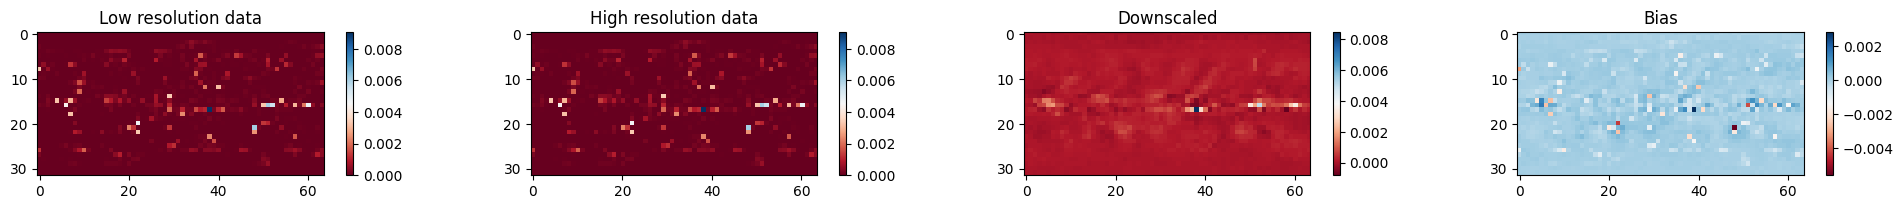

In [32]:
""" Visualize? """

from climate_learn.utils.visualize import visualize
print('16x4x2 bottleneck')
visualize(model_module, data_module)

64x4x2 bottleneck


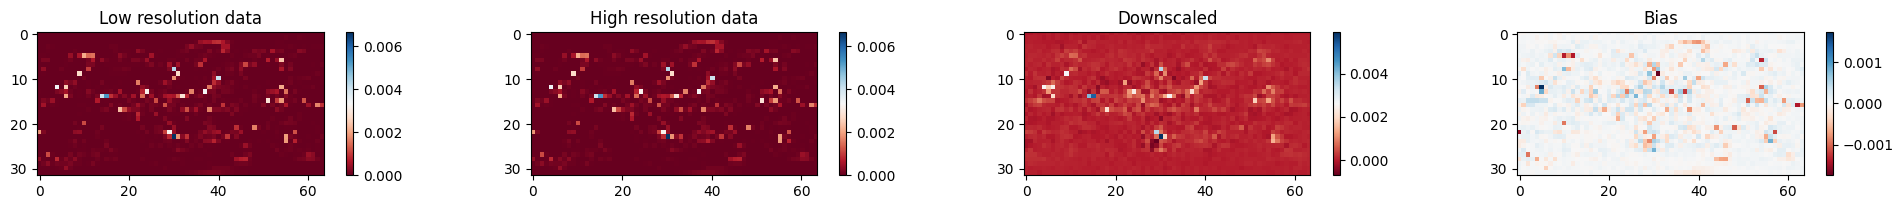

In [34]:
""" Visualize? """

from climate_learn.utils.visualize import visualize
print('64x4x2 bottleneck')
visualize(model_module, data_module)

96x4x2 bottleneck


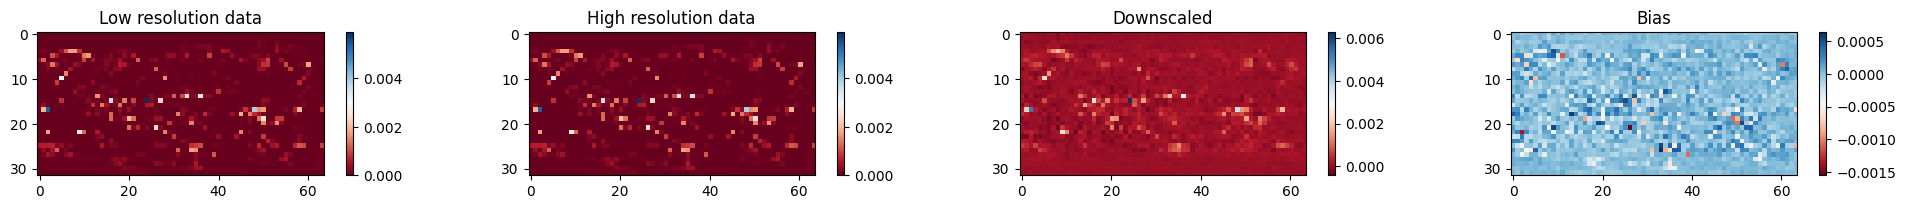

In [37]:
""" Visualize? """

from climate_learn.utils.visualize import visualize
print('96x4x2 bottleneck')
visualize(model_module, data_module)

## Jessica Forecast Code

In [1]:
import torch
from torch.utils.data import DataLoader
from pytorch_lightning import LightningDataModule
from torchvision import transforms

from climate_learn.data.modules import *
from climate_learn.utils.datetime import Year, Hours

def collate_fn(batch):
    inp = torch.stack([batch[i][0] for i in range(len(batch))])
    out = torch.stack([batch[i][1] for i in range(len(batch))])
    variables = batch[0][2]
    out_variables = batch[0][3]
    return inp, out, variables, out_variables

class MyDataModule(LightningDataModule):
    def __init__(
        self,
        dataset,
        task,
        padding,
        lower_dir,
        root_dir,
        in_vars,
        out_vars,
        train_start_year,
        val_start_year,
        test_start_year,
        end_year = Year(2018),
        root_highres_dir=None,
        pred_range = Hours(6),
        subsample = Hours(1),
        batch_size = 64,
        num_workers = 0,
        pin_memory = False,
    ):
        super().__init__()

        assert end_year >= test_start_year and test_start_year > val_start_year and val_start_year > train_start_year
        self.save_hyperparameters(logger=False)

        if(dataset != "ERA5"):
            raise NotImplementedError("Only support ERA5")
        if task == "downscaling" and root_highres_dir is None:
            raise NotImplementedError("High-resolution data has to be provided for downscaling")
            
        task_string = "MyForecasting"
        caller = eval(f"{dataset.upper()}{task_string}")
        
        train_years = range(train_start_year, val_start_year)
        self.train_dataset = caller(padding, lower_dir, root_dir, root_highres_dir, in_vars, out_vars, pred_range.hours(), train_years, subsample.hours(), "train")

        val_years = range(val_start_year, test_start_year)
        self.val_dataset = caller(padding, lower_dir, root_dir, root_highres_dir, in_vars, out_vars, pred_range.hours(), val_years, subsample.hours(), "val")
        self.val_dataset.set_normalize(self.train_dataset.inp_transform, self.train_dataset.out_transform)

        test_years = range(test_start_year, end_year + 1)
        self.test_dataset = caller(padding, lower_dir, root_dir, root_highres_dir, in_vars, out_vars, pred_range.hours(), test_years, subsample.hours(), "test")
        self.test_dataset.set_normalize(self.train_dataset.inp_transform, self.train_dataset.out_transform)

    def get_lat_lon(self):
        return self.train_dataset.lat, self.train_dataset.lon

    def get_out_transforms(self):
        return self.train_dataset.out_transform

    def get_climatology(self, split="val"):
        if split == "train":
            return self.train_dataset.get_climatology()
        elif split == "val":
            return self.val_dataset.get_climatology()
        elif split == "test":
            return self.test_dataset.get_climatology()
        else:
            raise NotImplementedError

    def train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            shuffle=True,
            batch_size=self.hparams.batch_size,
            num_workers=self.hparams.num_workers,
            pin_memory=self.hparams.pin_memory,
            collate_fn=collate_fn,
        )

    def val_dataloader(self):
        return DataLoader(
            self.val_dataset,
            shuffle=False,
            batch_size=self.hparams.batch_size,
            num_workers=self.hparams.num_workers,
            pin_memory=self.hparams.pin_memory,
            collate_fn=collate_fn,
        )

    def test_dataloader(self):
        return DataLoader(
            self.test_dataset,
            shuffle=False,
            batch_size=self.hparams.batch_size,
            num_workers=self.hparams.num_workers,
            pin_memory=self.hparams.pin_memory,
            collate_fn=collate_fn,
        )

class ERA5MyForecasting(ERA5):
    def __init__(self, padding, lower_dir, root_dir, root_highres_dir, in_vars, out_vars, pred_range, years, subsample=1, split='train'):
        print (f'Creating {split} dataset')
        super().__init__(root_dir, root_highres_dir, in_vars, years, split)
        
        self.in_vars = in_vars
        self.out_vars = out_vars
        self.pred_range = pred_range

        data_type = in_vars[0]

        inp_data = torch.cat([
            torch.load(f"{root_dir}/{lower_dir}/{'tp' if data_type == 'total_precipitation' else 'tmp'}_{yr}_5.625deg.pt") for yr in years
        ])
        dataset = eval(f'data_module.{split}_dataset')
        last_idx = np.searchsorted(dataset.time, np.datetime64(datetime.strptime(f"{years[-1]}-12-28:23", "%Y-%m-%d:%H")))
        
        print("--------------LENGTHS-------------")
        print(inp_data.shape)
        print(last_idx)
        inp_data = inp_data[0:last_idx]
        
        inp_data = torch.reshape(inp_data, (inp_data.shape[0], 1, 16, -1))
        inp_data = torch.nn.functional.pad(inp_data, padding, "constant")
        #inp_data = transforms.Resize((32,64))(inp_data)

        out_data = xr.concat([self.data_dict[k] for k in out_vars], dim='level')

        self.inp_data = inp_data.detach().numpy().astype(np.float32)
        self.out_data = out_data[pred_range::subsample].to_numpy().astype(np.float32)

        # print(len(self.inp_data))
        # print(len(self.out_data))
        print(self.inp_data.shape)
        print(self.out_data.shape)
        print("----------------------------------")
        assert len(self.inp_data) == len(self.out_data)

        self.downscale_ratio = 1

        if split == 'train':
            self.inp_transform = self.get_normalize(self.inp_data)
            self.out_transform = self.get_normalize(self.out_data)
        else:
            self.inp_transform = None
            self.out_transform = None

        self.time = self.data_dict[in_vars[0]].time.to_numpy()[:-pred_range:subsample].copy()
        self.inp_lon = self.data_dict[in_vars[0]].lon.to_numpy().copy()
        self.inp_lat = self.data_dict[in_vars[0]].lat.to_numpy().copy()
        self.out_lon = self.data_dict[out_vars[0]].lon.to_numpy().copy()
        self.out_lat = self.data_dict[out_vars[0]].lat.to_numpy().copy()

        del self.data_dict

    def get_normalize(self, data):
        mean = np.mean(data, axis=(0, 2, 3))
        std = np.std(data, axis=(0, 2, 3))
        return transforms.Normalize(mean, std)

    def set_normalize(self, inp_normalize, out_normalize): # for val and test
        self.inp_transform = inp_normalize
        self.out_transform = out_normalize

    def get_climatology(self):
        return torch.from_numpy(self.out_data.mean(axis=0))

    def __getitem__(self, index):
        inp = torch.from_numpy(self.inp_data[index])
        out = torch.from_numpy(self.out_data[index])
        return self.inp_transform(inp), self.out_transform(out), self.in_vars, self.out_vars

    def __len__(self):
        return len(self.inp_data)


## Train Forecast Model

In [11]:
from climate_learn.utils.datetime import Days

forecast_data_module = MyDataModule(
    dataset = "ERA5",
    task = "forecasting",
    padding = (28,28,8,8),
    lower_dir = "compressed_tp_16",
    root_dir = f"{base_dir}/data/weatherbench/era5/5.625",
    in_vars = ["total_precipitation"],
    out_vars = ["total_precipitation"],
    train_start_year = Year(1979),
    val_start_year = Year(2015),
    test_start_year = Year(2017),
    end_year = Year(2018),
    pred_range = Days(3),
    subsample = Hours(6),
    batch_size = 256,
    num_workers = 12
)

Creating train dataset


  0%|          | 0/36 [00:00<?, ?it/s]

--------------LENGTHS-------------
torch.Size([52595, 1, 128])
52583
(52583, 1, 32, 64)
(52583, 1, 32, 64)
----------------------------------
Creating val dataset


  0%|          | 0/2 [00:00<?, ?it/s]

--------------LENGTHS-------------
torch.Size([2924, 1, 128])
2912
(2912, 1, 32, 64)
(2912, 1, 32, 64)
----------------------------------
Creating test dataset


  0%|          | 0/2 [00:00<?, ?it/s]

--------------LENGTHS-------------
torch.Size([2920, 1, 128])
2908
(2908, 1, 32, 64)
(2908, 1, 32, 64)
----------------------------------


In [12]:
from climate_learn.models import load_model
from climate_learn.models import set_climatology

model_kwargs = {
    "in_channels": len(forecast_data_module.hparams.in_vars),
    "out_channels": len(forecast_data_module.hparams.out_vars),
    "n_blocks": 4
}

optim_kwargs = {
    "lr": 1e-4,
    "weight_decay": 1e-5,
    "warmup_epochs": 1,
    "max_epochs": 5,
}

forecast_model_module = load_model(name = "resnet", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)

set_climatology(forecast_model_module, forecast_data_module)

In [13]:
from climate_learn.training import Trainer, WandbLogger

trainer = Trainer(
    seed = 0,
    accelerator = "gpu",
    precision = 16,
    max_epochs = 5,
    logger = True,
    # logger = WandbLogger(project = "climate_tutorial", name = "forecast-vit")
)
trainer.fit(forecast_model_module, forecast_data_module)

Global seed set to 0


┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃    ┃ Name                       ┃ Type              ┃ Params ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0  │ net                        │ ResNet            │  1.2 M │
│ 1  │ net.activation             │ LeakyReLU         │      0 │
│ 2  │ net.image_proj             │ PeriodicConv2D    │  6.4 K │
│ 3  │ net.image_proj.padding     │ PeriodicPadding2D │      0 │
│ 4  │ net.image_proj.conv        │ Conv2d            │  6.4 K │
│ 5  │ net.blocks                 │ ModuleList        │  1.2 M │
│ 6  │ net.blocks.0               │ ResidualBlock     │  295 K │
│ 7  │ net.blocks.0.activation    │ LeakyReLU         │      0 │
│ 8  │ net.blocks.0.conv1         │ PeriodicConv2D    │  147 K │
│ 9  │ net.blocks.0.conv1.padding │ PeriodicPadding2D │      0 │
│ 10 │ net.blocks.0.conv1.conv    │ Conv2d            │  147 K │
│ 11 │ net.blocks.0.conv2         │ PeriodicConv2D    │  147 K │
│ 12 │ net.blocks.0.conv2.padding │ PeriodicPadding2D │      0 │
│ 13 │ net.blocks.0.conv2.conv    │ Conv2d            │  147 K │
│ 14 │ net.blocks.0.shortcut      │ Identity          │      0 │
│ 15 │ net.blocks.0.norm1         │ BatchNorm2d       │    256 │
│ 16 │ net.blocks.0.norm2         │ BatchNorm2d       │    256 │
│ 17 │ net.blocks.0.drop          │ Dropout           │      0 │
│ 18 │ net.blocks.1               │ ResidualBlock     │  295 K │
│ 19 │ net.blocks.1.activation    │ LeakyReLU         │      0 │
│ 20 │ net.blocks.1.conv1         │ PeriodicConv2D    │  147 K │
│ 21 │ net.blocks.1.conv1.padding │ PeriodicPadding2D │      0 │
│ 22 │ net.blocks.1.conv1.conv    │ Conv2d            │  147 K │
│ 23 │ net.blocks.1.conv2         │ PeriodicConv2D    │  147 K │
│ 24 │ net.blocks.1.conv2.padding │ PeriodicPadding2D │      0 │
│ 25 │ net.blocks.1.conv2.conv    │ Conv2d            │  147 K │
│ 26 │ net.blocks.1.shortcut      │ Identity          │      0 │
│ 27 │ net.blocks.1.norm1         │ BatchNorm2d       │    256 │
│ 28 │ net.blocks.1.norm2         │ BatchNorm2d       │    256 │
│ 29 │ net.blocks.1.drop          │ Dropout           │      0 │
│ 30 │ net.blocks.2               │ ResidualBlock     │  295 K │
│ 31 │ net.blocks.2.activation    │ LeakyReLU         │      0 │
│ 32 │ net.blocks.2.conv1         │ PeriodicConv2D    │  147 K │
│ 33 │ net.blocks.2.conv1.padding │ PeriodicPadding2D │      0 │
│ 34 │ net.blocks.2.conv1.conv    │ Conv2d            │  147 K │
│ 35 │ net.blocks.2.conv2         │ PeriodicConv2D    │  147 K │
│ 36 │ net.blocks.2.conv2.padding │ PeriodicPadding2D │      0 │
│ 37 │ net.blocks.2.conv2.conv    │ Conv2d            │  147 K │
│ 38 │ net.blocks.2.shortcut      │ Identity          │      0 │
│ 39 │ net.blocks.2.norm1         │ BatchNorm2d       │    256 │
│ 40 │ net.blocks.2.norm2         │ BatchNorm2d       │    256 │
│ 41 │ net.blocks.2.drop          │ Dropout           │      0 │
│ 42 │ net.blocks.3               │ ResidualBlock     │  295 K │
│ 43 │ net.blocks.3.activation    │ LeakyReLU         │      0 │
│ 44 │ net.blocks.3.conv1         │ PeriodicConv2D    │  147 K │
│ 45 │ net.blocks.3.conv1.padding │ PeriodicPadding2D │      0 │
│ 46 │ net.blocks.3.conv1.conv    │ Conv2d            │  147 K │
│ 47 │ net.blocks.3.conv2         │ PeriodicConv2D    │  147 K │
│ 48 │ net.blocks.3.conv2.padding │ PeriodicPadding2D │      0 │
│ 49 │ net.blocks.3.conv2.conv    │ Conv2d            │  147 K │
│ 50 │ net.blocks.3.shortcut      │ Identity          │      0 │
│ 51 │ net.blocks.3.norm1         │ BatchNorm2d       │    256 │
│ 52 │ net.blocks.3.norm2         │ BatchNorm2d       │    256 │
│ 53 │ net.blocks.3.drop          │ Dropout           │      0 │
│ 54 │ net.norm                   │ BatchNorm2d       │    256 │
│ 55 │ net.final                  │ PeriodicConv2D    │  6.3 K │
│ 56 │ net.final.padding          │ PeriodicPadding2D │      0 │
│ 57 │ net.final.conv             │ Conv2d            │  6.3 K │
│ 58 │ denormalization            │

Trainable params: 1.2 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.2 M                                                                                                
Total estimated model params size (MB): 2

Output()

In [12]:
torch.save(forecast_model_module.state_dict(), f"{base_dir}/saved_models/16Forecast")
visualize(forecast_model_module, forecast_data_module)
trainer.test(forecast_model_module, forecast_data_module)

Output()

/home/felix/Documents/Climate/climate_env/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                      Test metric                       ┃                      DataLoader 0                      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           test/acc_total_precipitation_day_3           │                  0.014559305575615265                  │
│         test/w_rmse_total_precipitation_day_3          │                 0.00045242839096137146                 │
│ test_climatology_baseline/w_rmse_total_precipitation_… │                 0.0004256685293205191                  │
└────────────────────────────────────────────────────────┴────────────────────────────────────────────────────────┘

In [14]:
from climate_learn.utils.datetime import Days

forecast_data_module = MyDataModule(
    dataset = "ERA5",
    task = "forecasting",
    lower_dir = "compressed_tp_64",
    root_dir = f"{base_dir}/data/weatherbench/era5/5.625",
    in_vars = ["total_precipitation"],
    out_vars = ["total_precipitation"],
    train_start_year = Year(1979),
    padding = None,
    val_start_year = Year(2015),
    test_start_year = Year(2017),
    end_year = Year(2018),
    pred_range = Days(3),
    subsample = Hours(6),
    batch_size = 256,
    num_workers = 12,
    padding = (16,16,8,8),

)

from climate_learn.models import load_model
from climate_learn.models import set_climatology

model_kwargs = {
    "in_channels": len(forecast_data_module.hparams.in_vars),
    "out_channels": len(forecast_data_module.hparams.out_vars),
    "n_blocks": 4
}

optim_kwargs = {
    "lr": 1e-4,
    "weight_decay": 1e-5,
    "warmup_epochs": 1,
    "max_epochs": 5,
}

forecast_model_module = load_model(name = "resnet", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)

set_climatology(forecast_model_module, forecast_data_module)

from climate_learn.training import Trainer, WandbLogger

trainer = Trainer(
    seed = 0,
    accelerator = "gpu",
    precision = 16,
    max_epochs = 5,
    logger = True,
    # logger = WandbLogger(project = "climate_tutorial", name = "forecast-vit")
)
trainer.fit(forecast_model_module, forecast_data_module)

torch.save(forecast_model_module.state_dict(), f"{base_dir}/saved_models/64Forecast")
visualize(forecast_model_module, forecast_data_module)
trainer.test(forecast_model_module, forecast_data_module)

Creating train dataset


  0%|          | 0/36 [00:00<?, ?it/s]

--------------LENGTHS-------------
torch.Size([52595, 1, 512])
52583
(52583, 1, 32, 64)
(52583, 1, 32, 64)
----------------------------------
Creating val dataset


  0%|          | 0/2 [00:00<?, ?it/s]

--------------LENGTHS-------------
torch.Size([2924, 1, 512])
2912
(2912, 1, 32, 64)
(2912, 1, 32, 64)
----------------------------------
Creating test dataset


  0%|          | 0/2 [00:00<?, ?it/s]

--------------LENGTHS-------------
torch.Size([2920, 1, 512])
2908


Global seed set to 0


(2908, 1, 32, 64)
(2908, 1, 32, 64)
----------------------------------


/home/felix/Documents/Climate/climate_env/lib/python3.8/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:604: UserWarning: Checkpoint directory /home/felix/Documents/Climate/climate_learn/climate_learn/checkpoints exists and is not empty.
  rank_zero_warn(f"Checkpoint directory {dirpath} exists and is not empty.")


┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃    ┃ Name                       ┃ Type              ┃ Params ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0  │ net                        │ ResNet            │  1.2 M │
│ 1  │ net.activation             │ LeakyReLU         │      0 │
│ 2  │ net.image_proj             │ PeriodicConv2D    │  6.4 K │
│ 3  │ net.image_proj.padding     │ PeriodicPadding2D │      0 │
│ 4  │ net.image_proj.conv        │ Conv2d            │  6.4 K │
│ 5  │ net.blocks                 │ ModuleList        │  1.2 M │
│ 6  │ net.blocks.0               │ ResidualBlock     │  295 K │
│ 7  │ net.blocks.0.activation    │ LeakyReLU         │      0 │
│ 8  │ net.blocks.0.conv1         │ PeriodicConv2D    │  147 K │
│ 9  │ net.blocks.0.conv1.padding │ PeriodicPadding2D │      0 │
│ 10 │ net.blocks.0.conv1.conv    │ Conv2d            │  147 K │
│ 11 │ net.blocks.0.conv2         │ PeriodicConv2D    │  147 K │
│ 12 │ net.blocks.0.conv2.padding │ PeriodicPadding2D │      0 │
│ 13 │ net.blocks.0.conv2.conv    │ Conv2d            │  147 K │
│ 14 │ net.blocks.0.shortcut      │ Identity          │      0 │
│ 15 │ net.blocks.0.norm1         │ BatchNorm2d       │    256 │
│ 16 │ net.blocks.0.norm2         │ BatchNorm2d       │    256 │
│ 17 │ net.blocks.0.drop          │ Dropout           │      0 │
│ 18 │ net.blocks.1               │ ResidualBlock     │  295 K │
│ 19 │ net.blocks.1.activation    │ LeakyReLU         │      0 │
│ 20 │ net.blocks.1.conv1         │ PeriodicConv2D    │  147 K │
│ 21 │ net.blocks.1.conv1.padding │ PeriodicPadding2D │      0 │
│ 22 │ net.blocks.1.conv1.conv    │ Conv2d            │  147 K │
│ 23 │ net.blocks.1.conv2         │ PeriodicConv2D    │  147 K │
│ 24 │ net.blocks.1.conv2.padding │ PeriodicPadding2D │      0 │
│ 25 │ net.blocks.1.conv2.conv    │ Conv2d            │  147 K │
│ 26 │ net.blocks.1.shortcut      │ Identity          │      0 │
│ 27 │ net.blocks.1.norm1         │ BatchNorm2d       │    256 │
│ 28 │ net.blocks.1.norm2         │ BatchNorm2d       │    256 │
│ 29 │ net.blocks.1.drop          │ Dropout           │      0 │
│ 30 │ net.blocks.2               │ ResidualBlock     │  295 K │
│ 31 │ net.blocks.2.activation    │ LeakyReLU         │      0 │
│ 32 │ net.blocks.2.conv1         │ PeriodicConv2D    │  147 K │
│ 33 │ net.blocks.2.conv1.padding │ PeriodicPadding2D │      0 │
│ 34 │ net.blocks.2.conv1.conv    │ Conv2d            │  147 K │
│ 35 │ net.blocks.2.conv2         │ PeriodicConv2D    │  147 K │
│ 36 │ net.blocks.2.conv2.padding │ PeriodicPadding2D │      0 │
│ 37 │ net.blocks.2.conv2.conv    │ Conv2d            │  147 K │
│ 38 │ net.blocks.2.shortcut      │ Identity          │      0 │
│ 39 │ net.blocks.2.norm1         │ BatchNorm2d       │    256 │
│ 40 │ net.blocks.2.norm2         │ BatchNorm2d       │    256 │
│ 41 │ net.blocks.2.drop          │ Dropout           │      0 │
│ 42 │ net.blocks.3               │ ResidualBlock     │  295 K │
│ 43 │ net.blocks.3.activation    │ LeakyReLU         │      0 │
│ 44 │ net.blocks.3.conv1         │ PeriodicConv2D    │  147 K │
│ 45 │ net.blocks.3.conv1.padding │ PeriodicPadding2D │      0 │
│ 46 │ net.blocks.3.conv1.conv    │ Conv2d            │  147 K │
│ 47 │ net.blocks.3.conv2         │ PeriodicConv2D    │  147 K │
│ 48 │ net.blocks.3.conv2.padding │ PeriodicPadding2D │      0 │
│ 49 │ net.blocks.3.conv2.conv    │ Conv2d            │  147 K │
│ 50 │ net.blocks.3.shortcut      │ Identity          │      0 │
│ 51 │ net.blocks.3.norm1         │ BatchNorm2d       │    256 │
│ 52 │ net.blocks.3.norm2         │ BatchNorm2d       │    256 │
│ 53 │ net.blocks.3.drop          │ Dropout           │      0 │
│ 54 │ net.norm                   │ BatchNorm2d       │    256 │
│ 55 │ net.final                  │ PeriodicConv2D    │  6.3 K │
│ 56 │ net.final.padding          │ PeriodicPadding2D │      0 │
│ 57 │ net.final.conv             │ Conv2d            │  6.3 K │
│ 58 │ denormalization            │

Trainable params: 1.2 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.2 M                                                                                                
Total estimated model params size (MB): 2

Output()

/home/felix/Documents/Climate/climate_env/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_con
nector.py:224: PossibleUserWarning: The dataloader, val_dataloader 0, does not have many workers which may be a 
bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on 
this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(

/home/felix/Documents/Climate/climate_env/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_con
nector.py:224: PossibleUserWarning: The dataloader, train_dataloader, does not have many workers which may be a 
bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on 
this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(

Output()

/home/felix/Documents/Climate/climate_env/lib/python3.8/site-packages/pytorch_lightning/trainer/connectors/data_connector.py:224: PossibleUserWarning: The dataloader, test_dataloader 0, does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` (try 12 which is the number of cpus on this machine) in the `DataLoader` init to improve performance.
  rank_zero_warn(


┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                      Test metric                       ┃                      DataLoader 0                      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           test/acc_total_precipitation_day_3           │                  0.00973127676067348                   │
│         test/w_rmse_total_precipitation_day_3          │                 0.0004500169463646497                  │
│ test_climatology_baseline/w_rmse_total_precipitation_… │                 0.0004256685293205191                  │
└────────────────────────────────────────────────────────┴────────────────────────────────────────────────────────┘

In [14]:
from climate_learn.utils.datetime import Days

forecast_data_module = MyDataModule(
    dataset = "ERA5",
    task = "forecasting",
    lower_dir = "compressed_tp_96",
    root_dir = f"{base_dir}/data/weatherbench/era5/5.625",
    in_vars = ["total_precipitation"],
    out_vars = ["total_precipitation"],
    train_start_year = Year(1979),
    val_start_year = Year(2015),
    test_start_year = Year(2017),
    end_year = Year(2018),
    pred_range = Days(3),
    subsample = Hours(6),
    batch_size = 256,
    num_workers = 12,
    padding = (8,8,8,8),
)

from climate_learn.models import load_model
from climate_learn.models import set_climatology

model_kwargs = {
    "in_channels": len(forecast_data_module.hparams.in_vars),
    "out_channels": len(forecast_data_module.hparams.out_vars),
    "n_blocks": 4
}

optim_kwargs = {
    "lr": 1e-4,
    "weight_decay": 1e-5,
    "warmup_epochs": 1,
    "max_epochs": 5,
}

forecast_model_module = load_model(name = "resnet", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)

set_climatology(forecast_model_module, forecast_data_module)

from climate_learn.training import Trainer, WandbLogger

trainer = Trainer(
    seed = 0,
    accelerator = "gpu",
    precision = 16,
    max_epochs = 5,
    logger = True
    # logger = WandbLogger(project = "climate_tutorial", name = "forecast-vit")
)
trainer.fit(forecast_model_module, forecast_data_module)

torch.save(forecast_model_module.state_dict(), a"{base_dir}/saved_models/96Forecast")


Creating train dataset


  0%|          | 0/36 [00:00<?, ?it/s]

--------------LENGTHS-------------
torch.Size([52595, 1, 768])
52583
(52583, 1, 32, 64)
(52583, 1, 32, 64)
----------------------------------
Creating val dataset


  0%|          | 0/2 [00:00<?, ?it/s]

--------------LENGTHS-------------
torch.Size([2924, 1, 768])
2912
(2912, 1, 32, 64)
(2912, 1, 32, 64)
----------------------------------
Creating test dataset


  0%|          | 0/2 [00:00<?, ?it/s]

--------------LENGTHS-------------
torch.Size([2920, 1, 768])
2908


Global seed set to 0


(2908, 1, 32, 64)
(2908, 1, 32, 64)
----------------------------------


┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃    ┃ Name                       ┃ Type              ┃ Params ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0  │ net                        │ ResNet            │  1.2 M │
│ 1  │ net.activation             │ LeakyReLU         │      0 │
│ 2  │ net.image_proj             │ PeriodicConv2D    │  6.4 K │
│ 3  │ net.image_proj.padding     │ PeriodicPadding2D │      0 │
│ 4  │ net.image_proj.conv        │ Conv2d            │  6.4 K │
│ 5  │ net.blocks                 │ ModuleList        │  1.2 M │
│ 6  │ net.blocks.0               │ ResidualBlock     │  295 K │
│ 7  │ net.blocks.0.activation    │ LeakyReLU         │      0 │
│ 8  │ net.blocks.0.conv1         │ PeriodicConv2D    │  147 K │
│ 9  │ net.blocks.0.conv1.padding │ PeriodicPadding2D │      0 │
│ 10 │ net.blocks.0.conv1.conv    │ Conv2d            │  147 K │
│ 11 │ net.blocks.0.conv2         │ PeriodicConv2D    │  147 K │
│ 12 │ net.blocks.0.conv2.padding │ PeriodicPadding2D │      0 │
│ 13 │ net.blocks.0.conv2.conv    │ Conv2d            │  147 K │
│ 14 │ net.blocks.0.shortcut      │ Identity          │      0 │
│ 15 │ net.blocks.0.norm1         │ BatchNorm2d       │    256 │
│ 16 │ net.blocks.0.norm2         │ BatchNorm2d       │    256 │
│ 17 │ net.blocks.0.drop          │ Dropout           │      0 │
│ 18 │ net.blocks.1               │ ResidualBlock     │  295 K │
│ 19 │ net.blocks.1.activation    │ LeakyReLU         │      0 │
│ 20 │ net.blocks.1.conv1         │ PeriodicConv2D    │  147 K │
│ 21 │ net.blocks.1.conv1.padding │ PeriodicPadding2D │      0 │
│ 22 │ net.blocks.1.conv1.conv    │ Conv2d            │  147 K │
│ 23 │ net.blocks.1.conv2         │ PeriodicConv2D    │  147 K │
│ 24 │ net.blocks.1.conv2.padding │ PeriodicPadding2D │      0 │
│ 25 │ net.blocks.1.conv2.conv    │ Conv2d            │  147 K │
│ 26 │ net.blocks.1.shortcut      │ Identity          │      0 │
│ 27 │ net.blocks.1.norm1         │ BatchNorm2d       │    256 │
│ 28 │ net.blocks.1.norm2         │ BatchNorm2d       │    256 │
│ 29 │ net.blocks.1.drop          │ Dropout           │      0 │
│ 30 │ net.blocks.2               │ ResidualBlock     │  295 K │
│ 31 │ net.blocks.2.activation    │ LeakyReLU         │      0 │
│ 32 │ net.blocks.2.conv1         │ PeriodicConv2D    │  147 K │
│ 33 │ net.blocks.2.conv1.padding │ PeriodicPadding2D │      0 │
│ 34 │ net.blocks.2.conv1.conv    │ Conv2d            │  147 K │
│ 35 │ net.blocks.2.conv2         │ PeriodicConv2D    │  147 K │
│ 36 │ net.blocks.2.conv2.padding │ PeriodicPadding2D │      0 │
│ 37 │ net.blocks.2.conv2.conv    │ Conv2d            │  147 K │
│ 38 │ net.blocks.2.shortcut      │ Identity          │      0 │
│ 39 │ net.blocks.2.norm1         │ BatchNorm2d       │    256 │
│ 40 │ net.blocks.2.norm2         │ BatchNorm2d       │    256 │
│ 41 │ net.blocks.2.drop          │ Dropout           │      0 │
│ 42 │ net.blocks.3               │ ResidualBlock     │  295 K │
│ 43 │ net.blocks.3.activation    │ LeakyReLU         │      0 │
│ 44 │ net.blocks.3.conv1         │ PeriodicConv2D    │  147 K │
│ 45 │ net.blocks.3.conv1.padding │ PeriodicPadding2D │      0 │
│ 46 │ net.blocks.3.conv1.conv    │ Conv2d            │  147 K │
│ 47 │ net.blocks.3.conv2         │ PeriodicConv2D    │  147 K │
│ 48 │ net.blocks.3.conv2.padding │ PeriodicPadding2D │      0 │
│ 49 │ net.blocks.3.conv2.conv    │ Conv2d            │  147 K │
│ 50 │ net.blocks.3.shortcut      │ Identity          │      0 │
│ 51 │ net.blocks.3.norm1         │ BatchNorm2d       │    256 │
│ 52 │ net.blocks.3.norm2         │ BatchNorm2d       │    256 │
│ 53 │ net.blocks.3.drop          │ Dropout           │      0 │
│ 54 │ net.norm                   │ BatchNorm2d       │    256 │
│ 55 │ net.final                  │ PeriodicConv2D    │  6.3 K │
│ 56 │ net.final.padding          │ PeriodicPadding2D │      0 │
│ 57 │ net.final.conv             │ Conv2d            │  6.3 K │
│ 58 │ denormalization            │

Trainable params: 1.2 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 1.2 M                                                                                                
Total estimated model params size (MB): 2

Output()

NameError: name 'visualize' is not defined

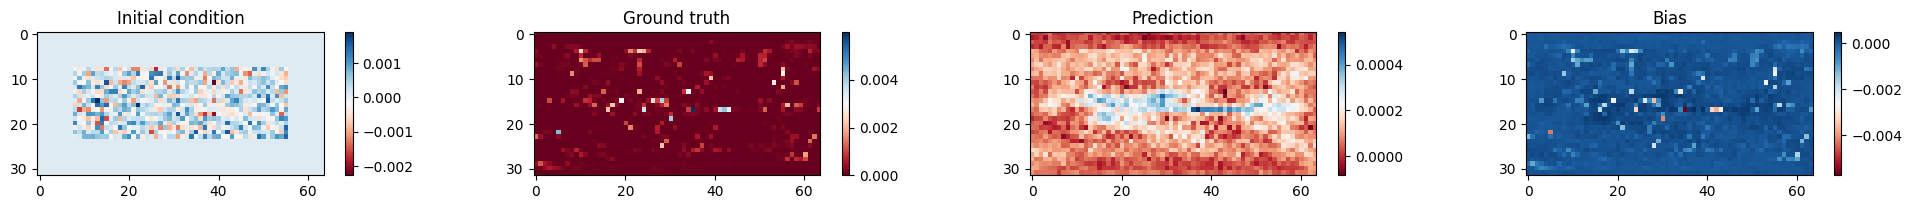

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                      Test metric                       ┃                      DataLoader 0                      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           test/acc_total_precipitation_day_3           │                  0.014730480697830398                  │
│         test/w_rmse_total_precipitation_day_3          │                 0.0004481149027791915                  │
│ test_climatology_baseline/w_rmse_total_precipitation_… │                 0.0004256685293205191                  │
└────────────────────────────────────────────────────────┴────────────────────────────────────────────────────────┘

In [15]:
from climate_learn.utils.visualize import visualize

visualize(forecast_model_module, forecast_data_module)
trainer.test(forecast_model_module, forecast_data_module)

Creating train dataset


  0%|          | 0/36 [00:00<?, ?it/s]

--------------LENGTHS-------------
torch.Size([52595, 1, 512])
52583
(52583, 1, 32, 64)
(52583, 1, 32, 64)
----------------------------------
Creating val dataset


  0%|          | 0/2 [00:00<?, ?it/s]

--------------LENGTHS-------------
torch.Size([2924, 1, 512])
2912
(2912, 1, 32, 64)
(2912, 1, 32, 64)
----------------------------------
Creating test dataset


  0%|          | 0/2 [00:00<?, ?it/s]

--------------LENGTHS-------------
torch.Size([2920, 1, 512])
2908
(2908, 1, 32, 64)
(2908, 1, 32, 64)
----------------------------------


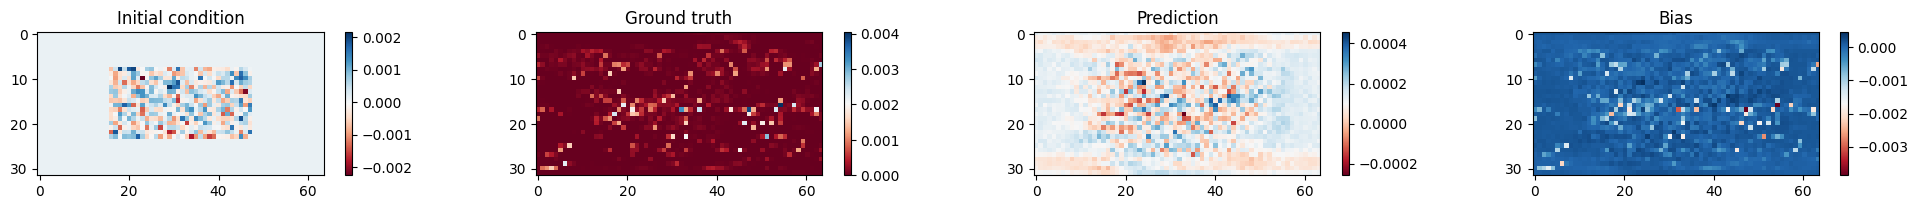

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                      Test metric                       ┃                      DataLoader 0                      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           test/acc_total_precipitation_day_3           │                 -0.0002459845354874721                 │
│         test/w_rmse_total_precipitation_day_3          │                 0.00046568167849842494                 │
│ test_climatology_baseline/w_rmse_total_precipitation_… │                 0.0004256685293205191                  │
└────────────────────────────────────────────────────────┴────────────────────────────────────────────────────────┘

In [20]:
from climate_learn.utils.visualize import visualize

forecast_model_module.load_state_dict(torch.load(f"{base_dir}/saved_models/64Forecast"))

forecast_data_module = MyDataModule(
    dataset = "ERA5",
    task = "forecasting",
    lower_dir = "compressed_tp_64",
    root_dir = f"{base_dir}/data/weatherbench/era5/5.625",
    in_vars = ["total_precipitation"],
    out_vars = ["total_precipitation"],
    train_start_year = Year(1979),
    val_start_year = Year(2015),
    test_start_year = Year(2017),
    end_year = Year(2018),
    pred_range = Days(3),
    subsample = Hours(6),
    batch_size = 256,
    num_workers = 12,
    padding = (16,16,8,8),
)

visualize(forecast_model_module, forecast_data_module)
trainer.test(forecast_model_module, forecast_data_module)

Creating train dataset


  0%|          | 0/36 [00:00<?, ?it/s]

--------------LENGTHS-------------
torch.Size([52595, 1, 128])
52583
(52583, 1, 32, 64)
(52583, 1, 32, 64)
----------------------------------
Creating val dataset


  0%|          | 0/2 [00:00<?, ?it/s]

--------------LENGTHS-------------
torch.Size([2924, 1, 128])
2912
(2912, 1, 32, 64)
(2912, 1, 32, 64)
----------------------------------
Creating test dataset


  0%|          | 0/2 [00:00<?, ?it/s]

--------------LENGTHS-------------
torch.Size([2920, 1, 128])
2908
(2908, 1, 32, 64)
(2908, 1, 32, 64)
----------------------------------


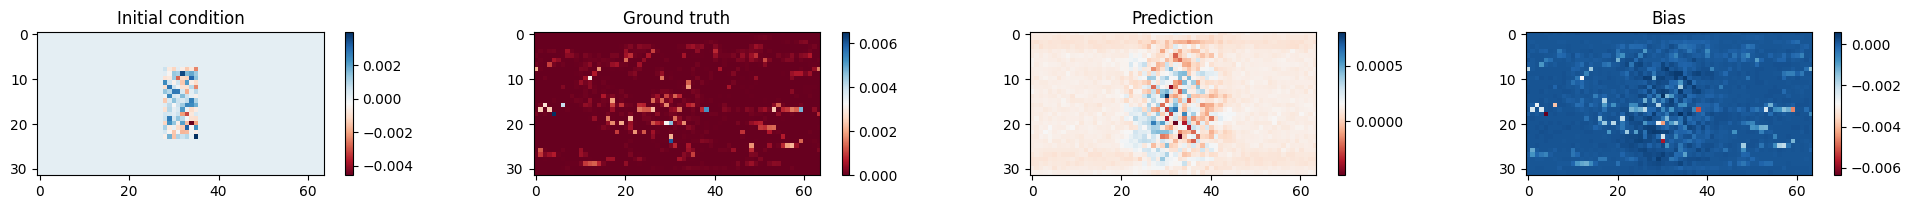

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                      Test metric                       ┃                      DataLoader 0                      ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           test/acc_total_precipitation_day_3           │                 0.00010831331280201365                 │
│         test/w_rmse_total_precipitation_day_3          │                 0.00046065585272543575                 │
│ test_climatology_baseline/w_rmse_total_precipitation_… │                 0.0004256685293205191                  │
└────────────────────────────────────────────────────────┴────────────────────────────────────────────────────────┘

In [19]:
from climate_learn.utils.visualize import visualize

forecast_model_module.load_state_dict(torch.load(f"{base_dir}/saved_models/16Forecast"))

forecast_data_module = MyDataModule(
    dataset = "ERA5",
    task = "forecasting",
    lower_dir = "compressed_tp_16",
    root_dir = f"{base_dir}/data/weatherbench/era5/5.625",
    in_vars = ["total_precipitation"],
    out_vars = ["total_precipitation"],
    train_start_year = Year(1979),
    val_start_year = Year(2015),
    test_start_year = Year(2017),
    end_year = Year(2018),
    pred_range = Days(3),
    subsample = Hours(6),
    batch_size = 256,
    num_workers = 12,
    padding = (28,28,8,8),
)

visualize(forecast_model_module, forecast_data_module)
trainer.test(forecast_model_module, forecast_data_module)

In [71]:
# import shutil

# #os.listdir('../data/weatherbench/era5/5.625/compressed_tp_nc')[0].split('_')
# base_data_dir = '../data/weatherbench/era5/5.625/compressed_tp_nc_96'
# for file in os.listdir(base_data_dir):
#     year = file.split('_')[1]
#     shutil.move(os.path.join(base_data_dir, file), os.path.join(base_data_dir, f"total_precipitation_{year}_5.625deg.nc"))

In [79]:
from climate_learn.data.modules.era5_module import ERA5CompressedForecasting

ERA5CompressedForecasting(
    root_dir = f"{base_dir}/data/weatherbench/era5/5.625_compressed16",
    root_highres_dir=None,
    in_vars = ["total_precipitation"],
    out_vars = ["total_precipitation"],
    history=1,
    window=6,
    pred_range=Days(3),
    years=range(1979,2016)
)


Creating train dataset


  0%|          | 0/37 [00:00<?, ?it/s]

KeyError: 'tp'

In [ ]:
from climate_learn.models import load_model
from climate_learn.models import set_climatology

model_kwargs = {
    "in_channels": len(forecast_data_module.hparams.in_vars),
    "out_channels": len(forecast_data_module.hparams.out_vars),
    "n_blocks": 4
}

optim_kwargs = {
    "lr": 1e-4,
    "weight_decay": 1e-5,
    "warmup_epochs": 1,
    "max_epochs": 5,
}

forecast_model_module = load_model(name = "resnet", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)

set_climatology(forecast_model_module, forecast_data_module)

In [ ]:
from climate_learn.training import Trainer, WandbLogger

trainer = Trainer(
    seed = 0,
    accelerator = "gpu",
    precision = 16,
    max_epochs = 5,
    # logger = WandbLogger(project = "climate_tutorial", name = "forecast-vit")
)

## Running on temperature data 

In [22]:
from climate_learn.utils.datetime import Year, Days, Hours
from climate_learn.data import DataModule

data_module = DataModule(
    dataset = "ERA5",
    task = "downscaling",
    root_dir = f"{base_dir}/data/weatherbench/era5/5.625",
    root_highres_dir = f"{base_dir}/data/weatherbench/era5/5.625",
    in_vars = ["2m_temperature"],
    out_vars = ["2m_temperature"],
    train_start_year = Year(1979),
    val_start_year = Year(2015),
    test_start_year = Year(2017),
    end_year = Year(2018),
    subsample = Hours(6),
    batch_size = 256,
    num_workers = 12
)

Creating train dataset


  0%|          | 0/36 [00:00<?, ?it/s]

  0%|          | 0/36 [00:00<?, ?it/s]

Creating val dataset


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

Creating test dataset


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

In [23]:
from climate_learn.models import load_model, set_climatology

model_kwargs = {
    "M": 192,
    "N": 128
}

optim_kwargs = {
    "optimizer": "adamw",
    "lr": 1e-4,
    "weight_decay": 1e-5,
    "warmup_epochs": 1,
    "max_epochs": 5,
}

model_module = load_model(name = "factorized_prior", task = "compression", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)
set_climatology(model_module, data_module)


In [24]:
from climate_learn.training import Trainer, WandbLogger

trainer = Trainer(
    seed = 1337,
    accelerator = "gpu",
    precision = 16,
    max_epochs = 5,
    logger = True
)

trainer.fit(model_module, data_module)
torch.save(model_module.state_dict(), f"{base_dir}/saved_models/temp_5_625FactorizedPrior_128N_192M")


Global seed set to 1337


┏━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃    ┃ Name                                          ┃ Type                    ┃ Params ┃
┡━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0  │ rd_loss                                       │ RateDistortionLoss      │      0 │
│ 1  │ rd_loss.mse                                   │ MSELoss                 │      0 │
│ 2  │ net                                           │ FactorizedPrior         │  3.0 M │
│ 3  │ net.entropy_bottleneck                        │ EntropyBottleneck       │ 11.7 K │
│ 4  │ net.entropy_bottleneck.likelihood_lower_bound │ LowerBound              │      0 │
│ 5  │ net.g_a                                       │ Sequential              │  1.5 M │
│ 6  │ net.g_a.0                                     │ Conv2d                  │  3.3 K │
│ 7  │ net.g_a.1                                     │ GDN                     │ 16.5 K │
│ 8  │ net.g_a.1.beta_reparam                        │ NonNegativeParametrizer │      0 │
│ 9  │ net.g_a.1.beta_reparam.lower_bound            │ LowerBound              │      0 │
│ 10 │ net.g_a.1.gamma_reparam                       │ NonNegativeParametrizer │      0 │
│ 11 │ net.g_a.1.gamma_reparam.lower_bound           │ LowerBound              │      0 │
│ 12 │ net.g_a.2                                     │ Conv2d                  │  409 K │
│ 13 │ net.g_a.3                                     │ GDN                     │ 16.5 K │
│ 14 │ net.g_a.3.beta_reparam                        │ NonNegativeParametrizer │      0 │
│ 15 │ net.g_a.3.beta_reparam.lower_bound            │ LowerBound              │      0 │
│ 16 │ net.g_a.3.gamma_reparam                       │ NonNegativeParametrizer │      0 │
│ 17 │ net.g_a.3.gamma_reparam.lower_bound           │ LowerBound              │      0 │
│ 18 │ net.g_a.4                                     │ Conv2d                  │  409 K │
│ 19 │ net.g_a.5                                     │ GDN                     │ 16.5 K │
│ 20 │ net.g_a.5.beta_reparam                        │ NonNegativeParametrizer │      0 │
│ 21 │ net.g_a.5.beta_reparam.lower_bound            │ LowerBound              │      0 │
│ 22 │ net.g_a.5.gamma_reparam                       │ NonNegativeParametrizer │      0 │
│ 23 │ net.g_a.5.gamma_reparam.lower_bound           │ LowerBound              │      0 │
│ 24 │ net.g_a.6                                     │ Conv2d                  │  614 K │
│ 25 │ net.g_s                                       │ Sequential              │  1.5 M │
│ 26 │ net.g_s.0                                     │ ConvTranspose2d         │  614 K │
│ 27 │ net.g_s.1                                     │ GDN                     │ 16.5 K │
│ 28 │ net.g_s.1.beta_reparam                        │ NonNegativeParametrizer │      0 │
│ 29 │ net.g_s.1.beta_reparam.lower_bound            │ LowerBound              │      0 │
│ 30 │ net.g_s.1.gamma_reparam                       │ NonNegativeParametrizer │      0 │
│ 31 │ net.g_s.1.gamma_reparam.lower_bound           │ LowerBound              │      0 │
│ 32 │ net.g_s.2                                     │ ConvTranspose2d         │  409 K │
│ 33 │ net.g_s.3                                     │ GDN                     │ 16.5 K │
│ 34 │ net.g_s.3.beta_reparam                        │ NonNegativeParametrizer │      0 │
│ 35 │ net.g_s.3.beta_reparam.lower_bound            │ LowerBound              │      0 │
│ 36 │ net.g_s.3.gamma_reparam                       │ NonNegativeParametrizer │      0 │
│ 37 │ net.g_s.3.gamma_reparam.lower_bound           │ LowerBound              │      0 │
│ 38 │ net.g_s.4                                     │ ConvTranspose2d         │  409 K │
│ 39 │ net.g_s.5                                     │ GDN                     │ 16.5 K │
│ 40 │ net.g_s.5.beta_reparam                        │ NonNegativeParametrizer │      0 │
│ 41 │ net.g_s.5.beta_reparam.lower_boun

Trainable params: 3.0 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 3.0 M                                                                                                
Total estimated model params size (MB): 5

Output()

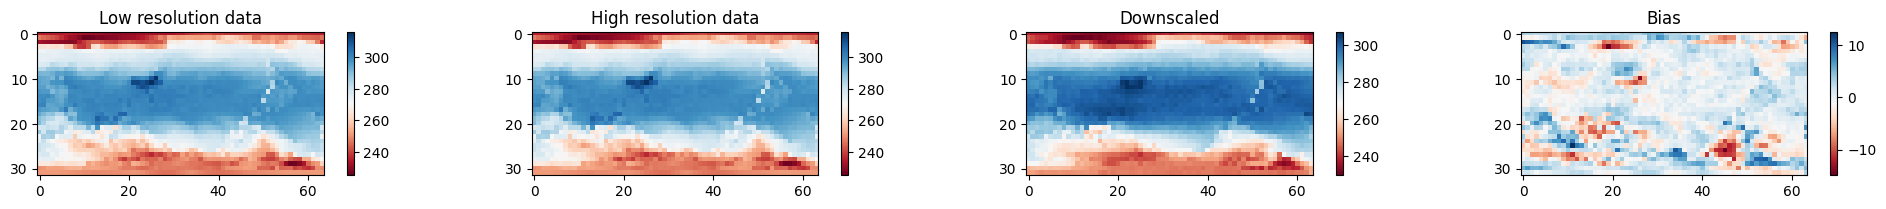

Output()

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃                Test metric                ┃               DataLoader 0                ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│               test/bpp_loss               │            3.6065125465393066             │
│                 test/loss                 │            18.616430282592773             │
│  test/mean_bias:mean_bias_2m_temperature  │                    0.0                    │
│               test/mse_loss               │            0.02308329939842224            │
│ test/pearson_loss:pearsonr_2m_temperature │                    1.0                    │
└───────────────────────────────────────────┴───────────────────────────────────────────┘

In [25]:
visualize(model_module, data_module)
trainer.test(model_module, data_module)

In [27]:
os.mkdir( f"{base_dir}/data/weatherbench/era5/5.625/compressed_t2m_192")

In [1]:
def save_compressed_data(split):
  dataset = eval(f"data_module.{split}_dataset")
  for year in dataset.years:
    print(f"Saving: {year}")
    idxs = [np.searchsorted(dataset.time, 
                            np.datetime64(datetime.strptime(dt, "%Y-%m-%d:%H"))) for dt in [f"{year}-01-01:00", f"{year}-12-31:23"]]
    y_hat = model_module.net.forward(
      dataset[idxs[0]:idxs[1]][0], # x
    )['y_hat']
    b_s, _, _, _ = y_hat.shape
    print(y_hat.shape)
    torch.save(
        torch.reshape(y_hat, (b_s, 1, -1)),
        f"{base_dir}/data/weatherbench/era5/5.625/compressed_t2m_192/t2m_{year}_5.625deg.pt"
    )

save_compressed_data('train')
save_compressed_data('test')
save_compressed_data('val')

NameError: name 'data_module' is not defined

## Forecast Temperature Data

In [ ]:
import torch
from torch.utils.data import DataLoader
from pytorch_lightning import LightningDataModule
from torchvision import transforms

from climate_learn.data.modules import *
from climate_learn.utils.datetime import Year, Hours

def collate_fn(batch):
    inp = torch.stack([batch[i][0] for i in range(len(batch))])
    out = torch.stack([batch[i][1] for i in range(len(batch))])
    variables = batch[0][2]
    out_variables = batch[0][3]
    return inp, out, variables, out_variables

class MyDataModule(LightningDataModule):
    def __init__(
        self,
        dataset,
        task,
        padding,
        lower_dir,
        root_dir,
        in_vars,
        out_vars,
        train_start_year,
        val_start_year,
        test_start_year,
        end_year = Year(2018),
        root_highres_dir=None,
        pred_range = Hours(6),
        subsample = Hours(1),
        batch_size = 64,
        num_workers = 0,
        pin_memory = False,
    ):
        super().__init__()

        assert end_year >= test_start_year and test_start_year > val_start_year and val_start_year > train_start_year
        self.save_hyperparameters(logger=False)

        if(dataset != "ERA5"):
            raise NotImplementedError("Only support ERA5")
        if task == "downscaling" and root_highres_dir is None:
            raise NotImplementedError("High-resolution data has to be provided for downscaling")
            
        task_string = "MyForecasting"
        caller = eval(f"{dataset.upper()}{task_string}")
        
        train_years = range(train_start_year, val_start_year)
        self.train_dataset = caller(padding, lower_dir, root_dir, root_highres_dir, in_vars, out_vars, pred_range.hours(), train_years, subsample.hours(), "train")

        val_years = range(val_start_year, test_start_year)
        self.val_dataset = caller(padding, lower_dir, root_dir, root_highres_dir, in_vars, out_vars, pred_range.hours(), val_years, subsample.hours(), "val")
        self.val_dataset.set_normalize(self.train_dataset.inp_transform, self.train_dataset.out_transform)

        test_years = range(test_start_year, end_year + 1)
        self.test_dataset = caller(padding, lower_dir, root_dir, root_highres_dir, in_vars, out_vars, pred_range.hours(), test_years, subsample.hours(), "test")
        self.test_dataset.set_normalize(self.train_dataset.inp_transform, self.train_dataset.out_transform)

    def get_lat_lon(self):
        return self.train_dataset.lat, self.train_dataset.lon

    def get_out_transforms(self):
        return self.train_dataset.out_transform

    def get_climatology(self, split="val"):
        if split == "train":
            return self.train_dataset.get_climatology()
        elif split == "val":
            return self.val_dataset.get_climatology()
        elif split == "test":
            return self.test_dataset.get_climatology()
        else:
            raise NotImplementedError

    def train_dataloader(self):
        return DataLoader(
            self.train_dataset,
            shuffle=True,
            batch_size=self.hparams.batch_size,
            num_workers=self.hparams.num_workers,
            pin_memory=self.hparams.pin_memory,
            collate_fn=collate_fn,
        )

    def val_dataloader(self):
        return DataLoader(
            self.val_dataset,
            shuffle=False,
            batch_size=self.hparams.batch_size,
            num_workers=self.hparams.num_workers,
            pin_memory=self.hparams.pin_memory,
            collate_fn=collate_fn,
        )

    def test_dataloader(self):
        return DataLoader(
            self.test_dataset,
            shuffle=False,
            batch_size=self.hparams.batch_size,
            num_workers=self.hparams.num_workers,
            pin_memory=self.hparams.pin_memory,
            collate_fn=collate_fn,
        )

class ERA5MyForecasting(ERA5):
    def __init__(self, padding, lower_dir, root_dir, root_highres_dir, in_vars, out_vars, pred_range, years, subsample=1, split='train'):
        print (f'Creating {split} dataset')
        super().__init__(root_dir, root_highres_dir, in_vars, years, split)
        
        self.in_vars = in_vars
        self.out_vars = out_vars
        self.pred_range = pred_range

        data_type = in_vars[0]

        inp_data = torch.cat([
            torch.load(f"{root_dir}/{lower_dir}/{'tp' if data_type == 'total_precipitation' else 'tmp'}_{yr}_5.625deg.pt") for yr in years
        ])
        dataset = eval(f'data_module.{split}_dataset')
        last_idx = np.searchsorted(dataset.time, np.datetime64(datetime.strptime(f"{years[-1]}-12-28:23", "%Y-%m-%d:%H")))
        
        print("--------------LENGTHS-------------")
        print(inp_data.shape)
        print(last_idx)
        inp_data = inp_data[0:last_idx]
        
        inp_data = torch.reshape(inp_data, (inp_data.shape[0], 1, 32, -1))
        inp_data = torch.nn.functional.pad(inp_data, padding, "constant")
        #inp_data = transforms.Resize((32,64))(inp_data)

        out_data = xr.concat([self.data_dict[k] for k in out_vars], dim='level')

        self.inp_data = inp_data.detach().numpy().astype(np.float32)
        self.out_data = out_data[pred_range::subsample].to_numpy().astype(np.float32)

        # print(len(self.inp_data))
        # print(len(self.out_data))
        print(self.inp_data.shape)
        print(self.out_data.shape)
        print("----------------------------------")
        assert len(self.inp_data) == len(self.out_data)

        self.downscale_ratio = 1

        if split == 'train':
            self.inp_transform = self.get_normalize(self.inp_data)
            self.out_transform = self.get_normalize(self.out_data)
        else:
            self.inp_transform = None
            self.out_transform = None

        self.time = self.data_dict[in_vars[0]].time.to_numpy()[:-pred_range:subsample].copy()
        self.inp_lon = self.data_dict[in_vars[0]].lon.to_numpy().copy()
        self.inp_lat = self.data_dict[in_vars[0]].lat.to_numpy().copy()
        self.out_lon = self.data_dict[out_vars[0]].lon.to_numpy().copy()
        self.out_lat = self.data_dict[out_vars[0]].lat.to_numpy().copy()

        del self.data_dict

    def get_normalize(self, data):
        mean = np.mean(data, axis=(0, 2, 3))
        std = np.std(data, axis=(0, 2, 3))
        return transforms.Normalize(mean, std)

    def set_normalize(self, inp_normalize, out_normalize): # for val and test
        self.inp_transform = inp_normalize
        self.out_transform = out_normalize

    def get_climatology(self):
        return torch.from_numpy(self.out_data.mean(axis=0))

    def __getitem__(self, index):
        inp = torch.from_numpy(self.inp_data[index])
        out = torch.from_numpy(self.out_data[index])
        return self.inp_transform(inp), self.out_transform(out), self.in_vars, self.out_vars

    def __len__(self):
        return len(self.inp_data)


In [ ]:
from climate_learn.utils.datetime import Days
from climate_learn.utils.visualize import visualize

forecast_data_module = MyDataModule(
    dataset = "ERA5",
    task = "forecasting",
    lower_dir = "compressed_t2m_192",
    root_dir = f"{base_dir}/data/weatherbench/era5/5.625",
    in_vars = ["2m_temperature"],
    out_vars = ["2m_temperature"],
    train_start_year = Year(1979),
    padding = None,
    val_start_year = Year(2015),
    test_start_year = Year(2017),
    end_year = Year(2018),
    pred_range = Days(3),
    subsample = Hours(6),
    batch_size = 256,
    num_workers = 12,
    padding = (8,8,0,0),

)

from climate_learn.models import load_model
from climate_learn.models import set_climatology

model_kwargs = {
    "in_channels": len(forecast_data_module.hparams.in_vars),
    "out_channels": len(forecast_data_module.hparams.out_vars),
    "n_blocks": 4
}

optim_kwargs = {
    "lr": 1e-4,
    "weight_decay": 1e-5,
    "warmup_epochs": 1,
    "max_epochs": 5,
}

forecast_model_module = load_model(name = "resnet", task = "forecasting", model_kwargs = model_kwargs, optim_kwargs = optim_kwargs)

set_climatology(forecast_model_module, forecast_data_module)

from climate_learn.training import Trainer, WandbLogger

trainer = Trainer(
    seed = 0,
    accelerator = "gpu",
    precision = 16,
    max_epochs = 5,
    logger = True,
    # logger = WandbLogger(project = "climate_tutorial", name = "forecast-vit")
)
trainer.fit(forecast_model_module, forecast_data_module)

torch.save(forecast_model_module.state_dict(), f"{base_dir}/saved_models/192forecast_t2m")
visualize(forecast_model_module, forecast_data_module)
trainer.test(forecast_model_module, forecast_data_module)

3-4 models
UNet
VAE
Denoising AE
(maybe see if we can get SOTA)

3-4 resolutions?
forecast results for:
- compressed
- uncompressed

||0.25(tbd)	|   	|   1.75(tbd) 	|	|5.625  	|   	|   	|   	|
|---|---	|---	|---	|---	|---	|---	|---	|---	|
||Compressed	|Uncompressed   	|Compressed   	|Uncompressed   	|Compressed   	|Uncompressed   	|Compressed   	|Uncompressed   	|
|UNet|   	|   	|   	|   	|   	|   	|   	|   	|
|VAE|   	|   	|   	|   	|   	|   	|   	|   	|
|Denoising AE|   	|   	|   	|   	|   	|   	|   	|   	|
|?|   	|   	|   	|   	|   	|   	|   	|   	|